In [1]:

!pip install sidetable -q

In [ ]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sidetable as stb
import seaborn as sns

# Leitura e inspeção dos dados

In [ ]:
# Carregando o dataset para o Data cleaning and Wrangling
df = pd.read_csv('data.csv', encoding= 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Definição e descrição das características presentes no dataset
  * InvoiceNo - Código da fatura
  * StockCode - Código de estoque do produto
  * Description - Descrição do produto
  * Quantity - Quantidade de itens comprados
  * InvoiceDate - Data do faturamento
  * UnitPrice - Preço unitário do item
  * CustomerID - Código de identificação do comprador
  * Country - País de origem

In [ ]:
# Descrição estatística das variáveis numéricas
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
# Informações sobre os tipos dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# Identificação e Correção de Dados duplicados

In [ ]:
# Contando o dados duplicados
df.duplicated().sum()


5268

In [ ]:
# Dropando valores duplicados
df = df.drop_duplicates()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Identificação e Correção de Dados Nulos/Faltantes

In [ ]:
# Verificando o percentual de valores faltantes
df.stb.missing()

,missing,total,percent
CustomerID,135037,536641,25.163377
Description,1454,536641,0.270945
InvoiceNo,0,536641,0.000000
StockCode,0,536641,0.000000
Quantity,0,536641,0.000000
InvoiceDate,0,536641,0.000000
UnitPrice,0,536641,0.000000
Country,0,536641,0.000000


In [ ]:
# Verificando a quantidade de valores faltantes
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [ ]:
# Dropando os valores nulos
df = df.dropna()

In [ ]:
# Verificando a quantidade de valores faltantes  novamente
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#

# Mudança do tipo de Arquivos incompatíveis

In [ ]:

# transformando coluna de data para date_time
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')
df['CustomerID'] = df['CustomerID'].astype(int)
df.info()

<ipython-input-18-6e03c4aebc94>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')
<ipython-input-18-6e03c4aebc94>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerID'] = df['CustomerID'].astype(int)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  int64         
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.6+ MB


# Filtragem de dados Negativos e Outliers exorbitantes

In [ ]:
# Filtragem para os valores maiores que 5000 em UnitPrice e 10000 para Quantity
df = df[~((df['Quantity']>10000) | (df['UnitPrice']>5000))]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [ ]:
# filtragem para valores menores ou iguais a 0 na coluna preços
df = df[~((df['Quantity']<0) | (df['UnitPrice']<0))]

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


<Axes: >

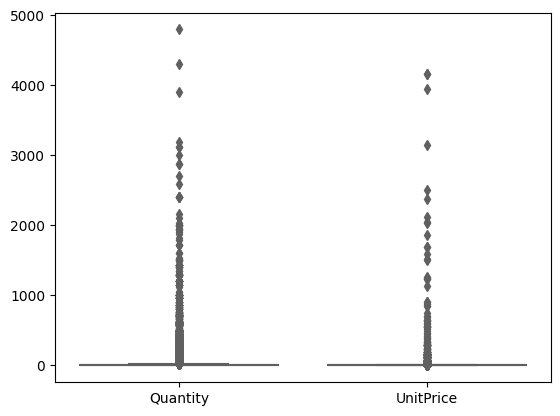

In [ ]:
# Plotando boxplot para visuzalizar os outliers
sns.boxplot(data=df[['Quantity','UnitPrice']])

In [ ]:
# identificando valores faltantes
df.stb.missing()

,missing,total,percent
InvoiceNo,0,392728,0.0
StockCode,0,392728,0.0
Description,0,392728,0.0
Quantity,0,392728,0.0
InvoiceDate,0,392728,0.0
UnitPrice,0,392728,0.0
CustomerID,0,392728,0.0
Country,0,392728,0.0


# Criação de coluna adicional

In [ ]:
# Criando uma nova coluna com o valor total da compra
df['ValorTotal'] = df['Quantity']*df['UnitPrice']
df

<ipython-input-25-05ea1c708d6f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ValorTotal'] = df['Quantity']*df['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ValorTotal
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


# Definição da última data dos registros

In [ ]:
# Selecionando a última data da coluna InvoiceDate
ultima_data = max(df['InvoiceDate'])
print(ultima_data)

2011-12-09 12:50:00


# Plotando os gráficos

In [ ]:
# Agrupando a soma de vendas por países, limitando os 10 maiores valores
grupo_paises = df.groupby(['Country'])['ValorTotal'].sum().sort_values(ascending=False)[:10]
df_grupo_paises = pd.DataFrame(grupo_paises).reset_index()
df_grupo_paises

,Country,ValorTotal
0,United Kingdom,7031228.694
1,Netherlands,285446.340
2,EIRE,265262.460
3,Germany,228678.400
4,France,208934.310
5,Australia,138453.810
6,Spain,61558.560
7,Switzerland,56443.950
8,Belgium,41196.340
9,Sweden,38367.830


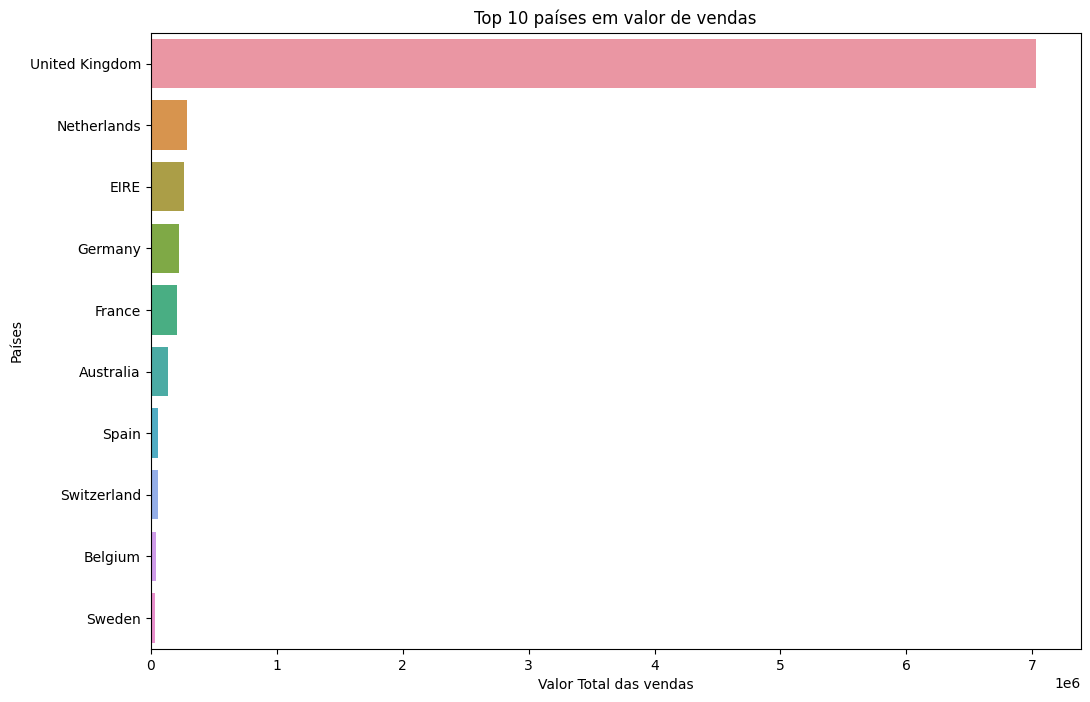

In [ ]:
# Plotando um gráfico com o top 10 países com maior valor de vendas
# Definindo a paleta de cores
sns.set_palette('flare')
# configurando o gráfico
plt.figure(figsize=(12,8))
sns.barplot(data=df_grupo_paises, y='Country', x='ValorTotal', orient='h');
# definindo as labels dos eixos
plt.title("Top 10 países em valor de vendas")
plt.xlabel("Valor Total das vendas")
plt.ylabel("Países")
# mostrando o gráfico
plt.show()

In [ ]:
# agrupando a soma de vendas por item, limitando os 10 maiores valores
grupo_itens = df.groupby(['Description'])['Quantity'].sum().sort_values(ascending=False)[:10]
df_grupo_itens = pd.DataFrame(grupo_itens).reset_index()
df_grupo_itens

,Description,Quantity
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319
1,JUMBO BAG RED RETROSPOT,46078
2,WHITE HANGING HEART T-LIGHT HOLDER,36706
3,ASSORTED COLOUR BIRD ORNAMENT,35263
4,PACK OF 72 RETROSPOT CAKE CASES,33670
5,POPCORN HOLDER,30919
6,RABBIT NIGHT LIGHT,27153
7,MINI PAINT SET VINTAGE,26076
8,PACK OF 12 LONDON TISSUES,25329
9,PACK OF 60 PINK PAISLEY CAKE CASES,24230


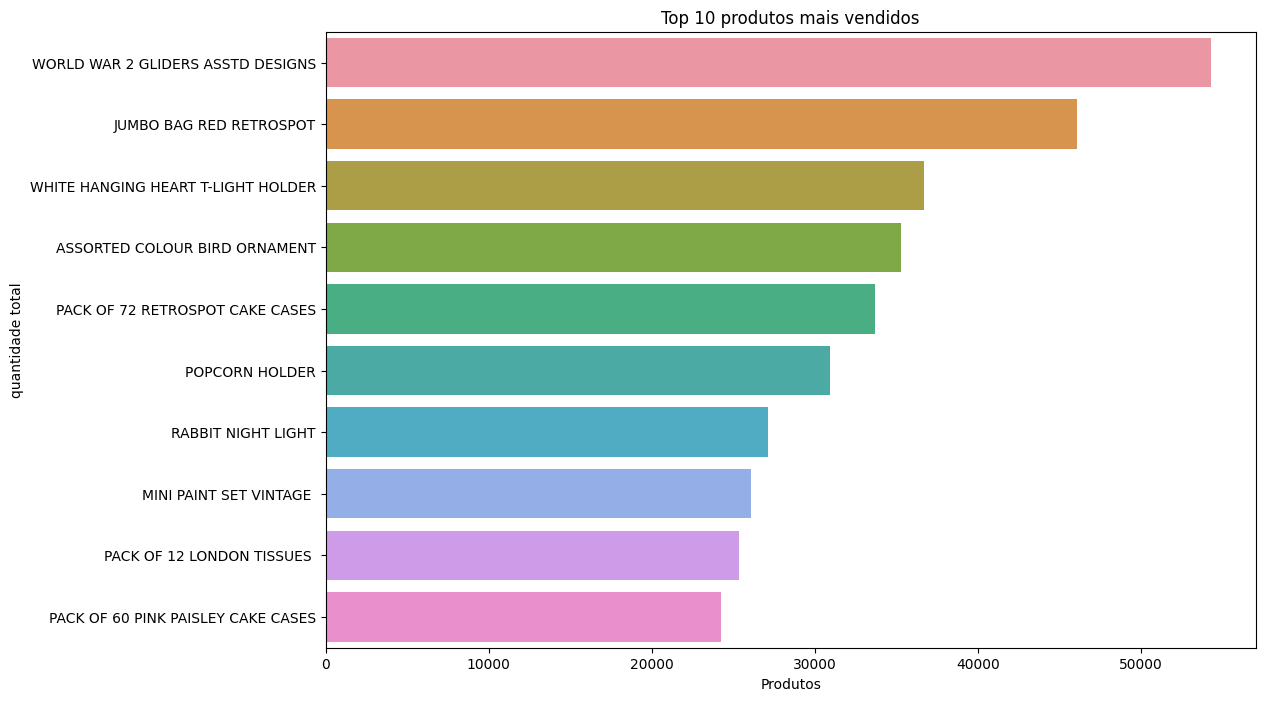

In [ ]:
# definindo a paleta de cores do gráfico
sns.set_palette('flare')
# configurando o gráfico
plt.figure(figsize=(12,8))
sns.barplot(data=df_grupo_itens, y='Description', x='Quantity', orient='h');
# Definindo as labels dos eixos
plt.title("Top 10 produtos mais vendidos")
plt.ylabel("quantidade total")
plt.xlabel("Produtos")
# mostrando o gráfico
plt.show()

In [ ]:

# Criando colunas de mês e ano
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year
df['MonthYear'] = df['InvoiceDate'].dt.strftime('%m-%Y')
# Agrupando as vendas por mês e ano e somando o valor total
grupo_vendas_mes = df.groupby(['MonthYear'])['ValorTotal'].sum().reset_index()
grupo_vendas_mes

<ipython-input-81-dd58f2c77c87>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['InvoiceDate'].dt.month
<ipython-input-81-dd58f2c77c87>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['InvoiceDate'].dt.year
<ipython-input-81-dd58f2c77c87>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

,MonthYear,ValorTotal
0,01-2011,490917.710
1,02-2011,446084.920
2,03-2011,594081.760
3,04-2011,468374.331
4,05-2011,669212.400
5,06-2011,660046.050
6,07-2011,598962.901
7,08-2011,644051.040
8,09-2011,950690.202
9,10-2011,1035642.450


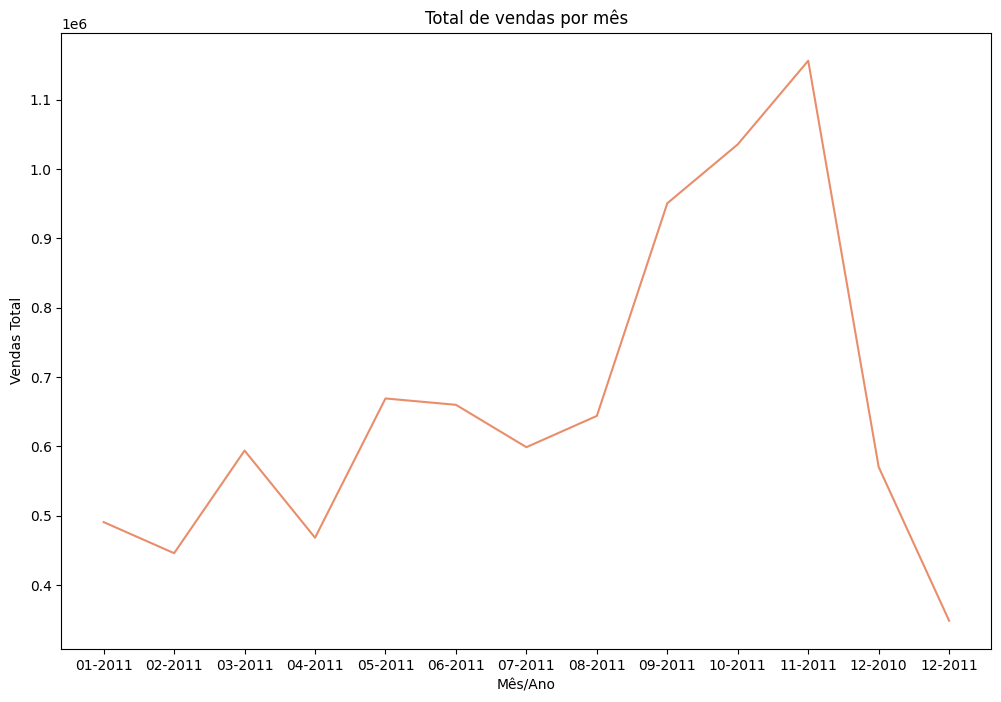

In [ ]:
# Definindo a paleta de cores do gráfico
sns.set_palette('flare')
# Criando o gráfico de total de vendas por mês
plt.figure(figsize=(12, 8))  # Define o tamanho da figura
sns.lineplot(data=grupo_vendas_mes, x='MonthYear', y='ValorTotal')
# definindo as labels dos eixos
plt.title("Total de vendas por mês")
plt.ylabel("Vendas Total")
plt.xlabel("Mês/Ano")
# Mostrando o gráfico
plt.show()

In [ ]:
# agrupando vendas por mês e país (limitando os 10 maiore resultados)
grupo_paises_mes = df.groupby(['Country','MonthYear'])['ValorTotal'].sum().sort_values(ascending=False)[:10]
# Criando um DataFrame a partir dos resultados do groupby
df_grupo_paises_mes = pd.DataFrame(grupo_paises_mes).reset_index()
df_grupo_paises_mes

,Country,MonthYear,ValorTotal
0,United Kingdom,11-2011,975251.390
1,United Kingdom,10-2011,821220.130
2,United Kingdom,09-2011,794806.692
3,United Kingdom,05-2011,542216.600
4,United Kingdom,06-2011,523775.590
5,United Kingdom,08-2011,497194.910
6,United Kingdom,12-2010,496477.340
7,United Kingdom,07-2011,484545.591
8,United Kingdom,03-2011,465784.190
9,United Kingdom,04-2011,408733.111


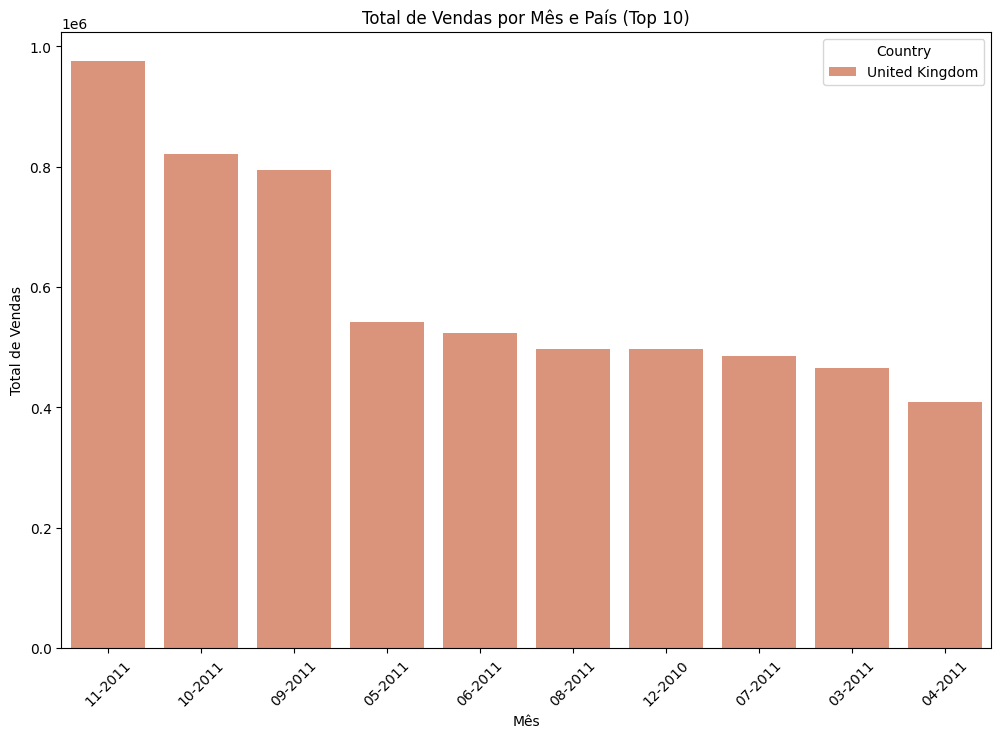

In [ ]:
sns.set_palette('flare')
# Criando o gráfico de barras
plt.figure(figsize=(12, 8))  # Define o tamanho da figura
sns.barplot(data=df_grupo_paises_mes, x='MonthYear', y='ValorTotal', hue='Country')
# definindo as labels dos eixos
plt.title("Total de Vendas por Mês e País (Top 10)")
plt.ylabel("Total de Vendas")
plt.xlabel("Mês")
# Rotacionando os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)
# Mostrando o gráfico
plt.show()

In [ ]:
# agrupando os dados de cliente(CustomerID) e do pedido (InvoiceNo) por Total do pedido (soma de ValorTotal)
df_grouped = df.groupby(['CustomerID', 'InvoiceNo']).agg({
    'InvoiceDate': 'max',
    'ValorTotal': 'sum'
}).reset_index()

# Agrupando novamente por cliente e calculando as métricas RFM
df_rfm = df_grouped.groupby('CustomerID').agg({
    'InvoiceDate': lambda date: (ultima_data - date.max()).days,
    'InvoiceNo': 'count',
    'ValorTotal': 'mean'
}).rename(columns={
    'InvoiceDate': 'Recencia',
    'InvoiceNo': 'Frequencia',
    'ValorTotal': 'TicketMedio'
}).reset_index()
df_rfm

,CustomerID,Recencia,Frequencia,TicketMedio
0,12347,1,7,615.714286
1,12348,74,4,449.310000
2,12349,18,1,1757.550000
3,12350,309,1,334.400000
4,12352,35,8,313.255000
...,...,...,...,...
4332,18280,277,1,180.600000
4333,18281,180,1,80.820000
4334,18282,7,2,89.025000
4335,18283,3,16,127.845625


In [ ]:
# nomeando o arquivo
e_comerce_RFM = 'e_comerce_RFM.csv'
# Salvando o DataFrame como um arquivo csv
df_rfm.to_csv(e_comerce_RFM, index=False)
df_rfm

,CustomerID,Recencia,Frequencia,TicketMedio
0,12347,1,7,615.714286
1,12348,74,4,449.310000
2,12349,18,1,1757.550000
3,12350,309,1,334.400000
4,12352,35,8,313.255000
...,...,...,...,...
4332,18280,277,1,180.600000
4333,18281,180,1,80.820000
4334,18282,7,2,89.025000
4335,18283,3,16,127.845625
